## 2. Gradient Tree Boosting
** 특징

- 여러개의 결정트리를 묶어 강력한 모델을 만듦
- RF와 달리 이전 트리의 오차를 보완하는 방식으로 순차적으로 트리를 생성--> 무작위성이 없음
- 강력한 사전가지치기 사용
- 보통 5가지 이하의 얕은 트리를 사용 --> 적은 메모리
- 얕은 트리(weak learner로 통칭)를 많이 연결, 각 트리는 데이터의 일부에 대해서만 예측을 수행--> 트리를 많이 추가할 수록 성능이 좋아짐

** 주요 매개변수

- 사전가지치기, 트리의 개수 외에 learning rate
- learning rate : 이전 트리의 오차를 얼마나 강하게 보정할 것인지를 제어 --> 학습률이 크면 보정을 강하게 하므로 모델의 복잡도 증가

In [2]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import datasets
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

## iris dataset
## 모든 parameter default

In [3]:
iris = datasets.load_iris()

In [11]:
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

In [12]:
gtb = GradientBoostingClassifier()

In [13]:
gtb.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [14]:
print('train data accuracy: {:.3f}'.format(gtb.score(X_train, y_train)))
print('test data accuracy: {:.3f}'.format(gtb.score(X_test, y_test)))

train data accuracy: 1.000
test data accuracy: 0.978


In [25]:
gtb_depth = GradientBoostingClassifier(max_depth=2)

gtb_depth.fit(X_train, y_train)

print('train data accuracy: {:.3f}'.format(gtb_depth.score(X_train, y_train)))
print('test data accuracy: {:.3f}'.format(gtb_depth.score(X_test, y_test)))

train data accuracy: 1.000
test data accuracy: 0.956


In [27]:
train_accuracy = []
test_accuracy = []

n_estimators = range(5,201,5)

for n_estimator in n_estimators:
    
    gtb_depth_n = GradientBoostingClassifier(n_estimators = n_estimator,
                                            random_state= n_estimator , max_depth=2)
    gtb_depth_n.fit(X_train, y_train)
    
    train_accuracy.append(gtb_depth_n.score(X_train, y_train))
    test_accuracy.append(gtb_depth_n.score(X_test, y_test))

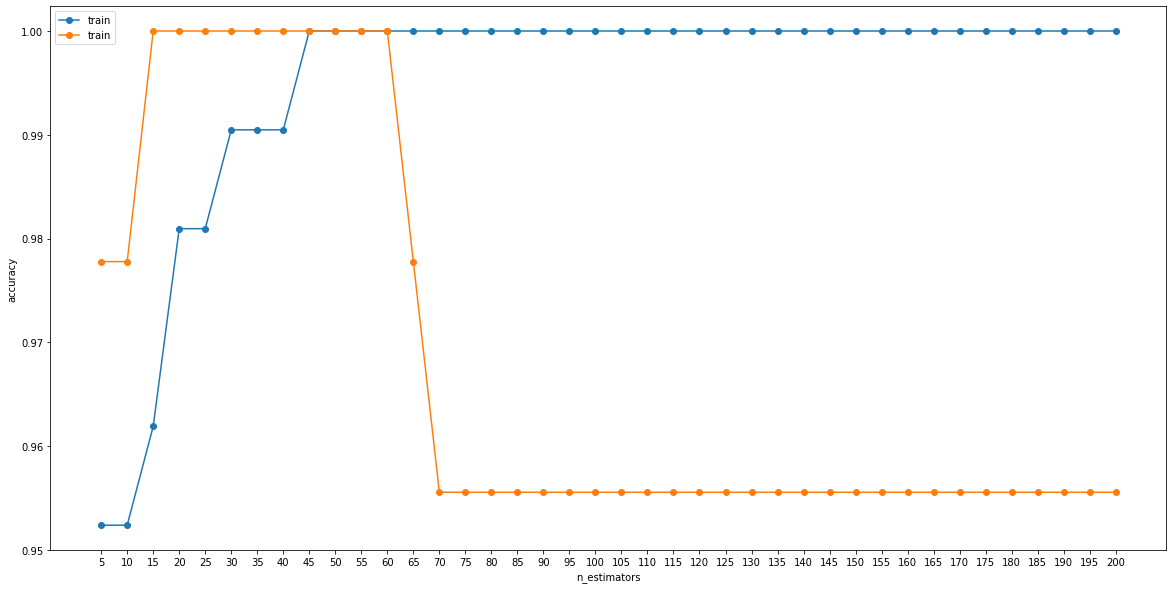

In [29]:
plt.figure(figsize=(20,10))
plt.plot(n_estimators, train_accuracy, label='train',marker='o')
plt.plot(n_estimators, test_accuracy, label='train',marker='o')
plt.xlabel('n_estimators')
plt.ylabel('accuracy')
plt.xticks(n_estimators,n_estimators)
plt.legend()
plt.show()

## 위의 그래프에 따른 가장 적절한 모델 생성을 위한 
## n_estimators, random_state 값 설정 및 그 결과 확인

In [30]:
gtb_depth = GradientBoostingClassifier(n_estimators = 45,
                                            random_state= 45 ,max_depth=2)

gtb_depth.fit(X_train, y_train)

print('train data accuracy: {:.3f}'.format(gtb_depth.score(X_train, y_train)))
print('test data accuracy: {:.3f}'.format(gtb_depth.score(X_test, y_test)))

train data accuracy: 1.000
test data accuracy: 1.000


## learning_rate을 낮춤으로서 과소 적합 방향으로 이동 (default 값은 0.1)

In [36]:
gtb_learning_rate = GradientBoostingClassifier(n_estimators = 45, random_state= 45 ,
                                       max_depth=2, learning_rate=0.01)

gtb_learning_rate.fit(X_train, y_train)

print('train data accuracy: {:.3f}'.format(gtb_learning_rate.score(X_train, y_train)))
print('test data accuracy: {:.3f}'.format(gtb_learning_rate.score(X_test, y_test)))

train data accuracy: 0.952
test data accuracy: 0.978


## cancer dataset  GradientBoostingClassifier

In [38]:
cancer = datasets.load_breast_cancer()

In [39]:
X = cancer.data
y = cancer.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [42]:
train_accuracy = []
test_accuracy = []

n_estimators = range(5,201,5)
r_states = range(505,701,5)

for n_estimator,r_state in zip(n_estimators, r_states):
    
    gtb_depth = GradientBoostingClassifier(n_estimators = n_estimator,
                                            random_state= r_state,
                                           max_depth=3)
    gtb_depth.fit(X_train, y_train)
    
    train_accuracy.append(gtb_depth.score(X_train, y_train))
    test_accuracy.append(gtb_depth.score(X_test, y_test))

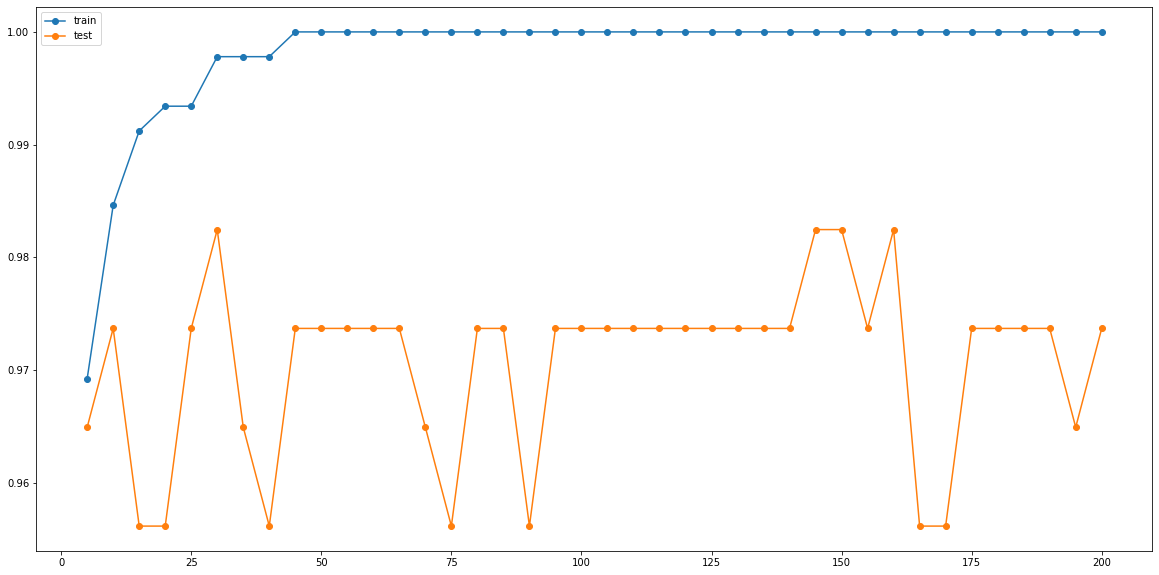

In [43]:
plt.figure(figsize=(20,10))
plt.plot(n_estimators,train_accuracy, label = 'train', marker='o')
plt.plot(n_estimators,test_accuracy, label = 'test', marker='o')
plt.legend()
plt.show()

## 위의 그래프에 따른 가장 적절한 모델 생성을 위한 
## n_estimators, random_state 값 설정 및 그 결과 확인

In [46]:
gtb_learning_rate = GradientBoostingClassifier(n_estimators = 30, random_state= 530 ,
                                       max_depth=3)

gtb_learning_rate.fit(X_train, y_train)

print('train data accuracy: {:.3f}'.format(gtb_learning_rate.score(X_train, y_train)))
print('test data accuracy: {:.3f}'.format(gtb_learning_rate.score(X_test, y_test)))

train data accuracy: 0.998
test data accuracy: 0.982
